# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing dataset

In [2]:
train_data = pd.read_csv("train-data.csv")
test_data = pd.read_csv("test-data.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


###### Removing the first unwanted column

In [5]:
train_data = train_data.iloc[:,1:]
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
train_data.shape

(6019, 13)

In [8]:
# We will have a look at the unique values in each categorical variable
print(train_data['Location'].unique())
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [9]:
# Lets check the number of missing values in our data
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [10]:
#We will drop the New_Price column as it has a lot of missing values
train_data = train_data.drop(['New_Price'], axis = 1)
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [11]:
#Now we have to drop the other missing values in the dataset
train_data = train_data.dropna(axis = 0)
train_data.shape

(5975, 12)

In [12]:
train_data = train_data.reset_index(drop = True)

# Feature Engineering

In [13]:
# We will extract extra information from the Name Column as Brand 
train_data['Brand'] = train_data['Name'].apply(lambda x: str(x).split(" ")[0])
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [14]:
# Now we can drop the Name Column
train_data = train_data.drop(['Name'], axis = 1)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [15]:
#Similarly we we remove the extra information in columns Mileage, Engine and Power
train_data['Power(bhp)'] = train_data['Power'].apply(lambda x: str(x).split(" ")[0])
train_data['Mileage(km/kg)'] = train_data['Mileage'].apply(lambda x: str(x).split(" ")[0])
train_data['Engine(CC)'] = train_data['Engine'].apply(lambda x: str(x).split(" ")[0])
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Power(bhp),Mileage(km/kg),Engine(CC)
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,58.16,26.6,998
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,126.2,19.67,1582
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,88.7,18.2,1199
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,88.76,20.77,1248
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,140.8,15.2,1968


In [16]:
# We will convert the columns Mileage, Engine, Power into numeric types
# Trying to convert the Power variable gives error so we need to check that variable 
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [17]:
# Checking Power variable
train_data['Power(bhp)'].unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', 'null', '132',
       '86.7', '73.94', '117.3', '218', '168.5', '89.84', '110', '90',
       '82.85', '67', '241.4', '35', '270.9', '126.32', '73', '130',
       '100.6', '150', '75.94', '215', '107.3', '37.48', '120', '178',
       '152', '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171',
       '76.8', '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86',
       '112', '88.73', '57.6', '157.75', '102.5', '201.1', '83.1',
       '6

In [18]:
# Above we observe that one of the unique values is 'null'
#We need to remove all the entries having value as 'null'
train_data[train_data['Power(bhp)'] == 'null'].count()

Location             103
Year                 103
Kilometers_Driven    103
Fuel_Type            103
Transmission         103
Owner_Type           103
Mileage              103
Engine               103
Power                103
Seats                103
Price                103
Brand                103
Power(bhp)           103
Mileage(km/kg)       103
Engine(CC)           103
dtype: int64

In [19]:
#Changing the 'null' in Power(bhp) to NaN value
train_data['Power(bhp)'] = train_data['Power(bhp)'].replace('null', np.nan)
train_data.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Price                  0
Brand                  0
Power(bhp)           103
Mileage(km/kg)         0
Engine(CC)             0
dtype: int64

In [20]:
#Dropping those missing values
train_data = train_data.dropna(axis = 0)
train_data = train_data.reset_index(drop = True)

In [21]:
train_data.shape

(5872, 15)

In [22]:
#Now we can change the datatype of Power(bhp)
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [23]:
#Now we drop the original Power, Mileage and Engine columns
train_data = train_data.drop(['Power'], axis = 1)
train_data = train_data.drop(['Engine'], axis = 1)
train_data = train_data.drop(['Mileage'], axis = 1)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Power(bhp),Mileage(km/kg),Engine(CC)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,58.16,26.60,998.0
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,126.20,19.67,1582.0
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,88.70,18.20,1199.0
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,88.76,20.77,1248.0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,140.80,15.20,1968.0


###### Now that we have cleaned the data, we can perform some data visualizations

# Data Visualization

### Brands which dominate second hand car market

Text(0.5, 1.0, 'Brands dominating the second hand car market')

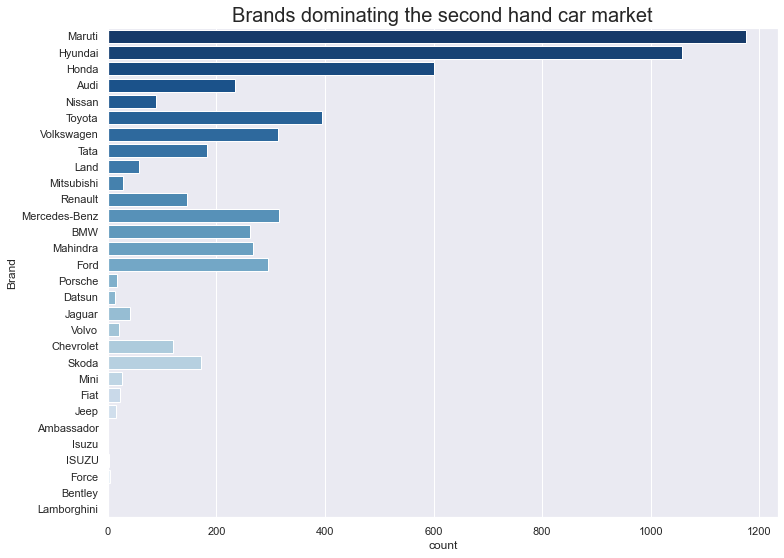

In [24]:
# Which brands dominate the second hand market in terms of count
plt.figure(figsize = (12, 9))
sns.countplot(y = "Brand", palette = "Blues_r", data = train_data)
plt.title("Brands dominating the second hand car market", size = 20)

###### We can see that Maruti tops the second hand market listings followed by Hyundai and Honda.

### Cities with most listings

Text(0.5, 1.0, 'Cities with most listings')

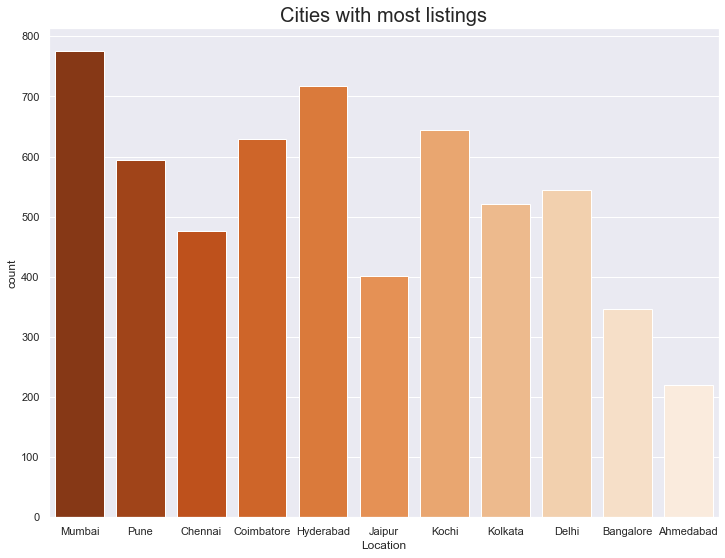

In [25]:
# Which City has the most listings
plt.figure(figsize = (12, 9))
sns.countplot(x = "Location", palette = "Oranges_r", data = train_data)
plt.title("Cities with most listings", size = 20)

Text(0.5, 1.0, 'Boxplot of cities vs price')

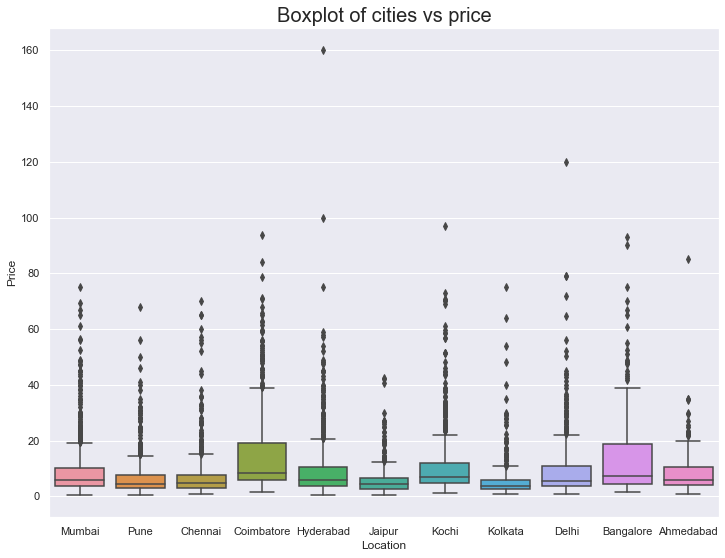

In [26]:
# City vs Price
plt.figure(figsize = (12, 9))
sns.boxplot(x = "Location", y = "Price",data = train_data)
plt.title("Boxplot of cities vs price", size = 20)

###### Here, we can see that Mumbai has the most listings followed by Hyderabad and Kochi

### Distribution of Price

D:\Anaconda\envs\carspred\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

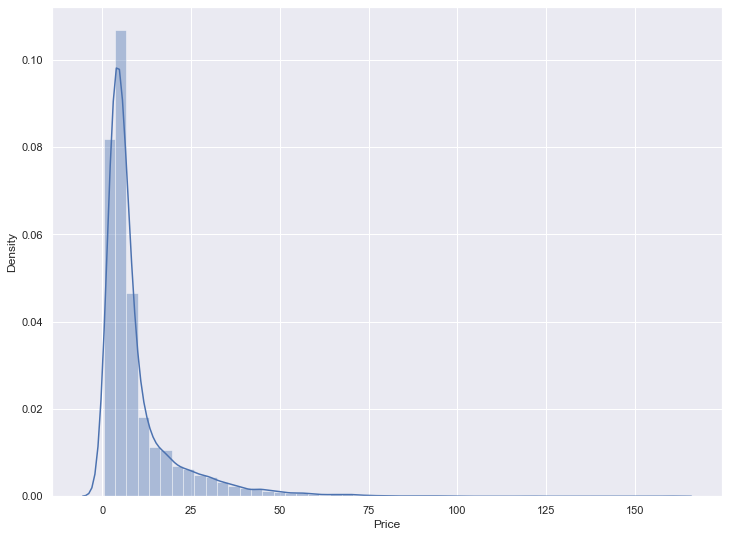

In [27]:
# Since we want to predict the price of the cars 
# Lets take a look at the distribution of Price
plt.figure(figsize = (12, 9))
sns.distplot(train_data["Price"])

### Price vs Age

Text(0.5, 1.0, 'Price of Cars vs Year')

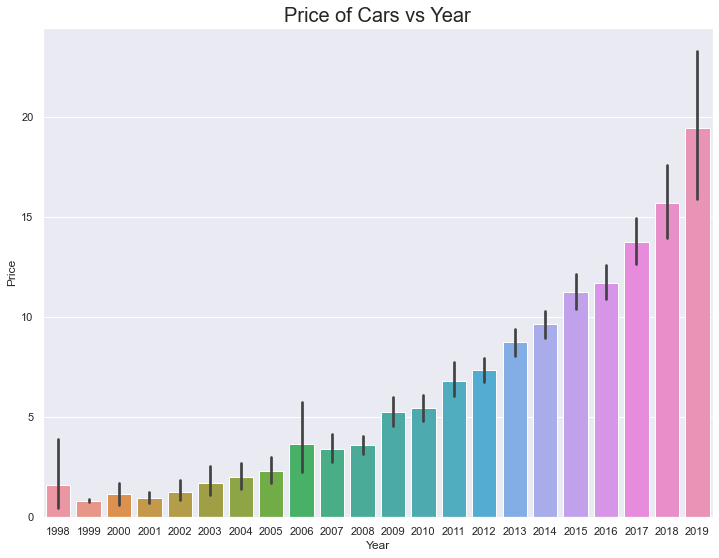

In [28]:
# Let us see the Prices of Cars According to their age
plt.figure(figsize = (12, 9))
sns.barplot(x = "Year", y = "Price", data = train_data)
plt.title("Price of Cars vs Year", size = 20)

###### It is clearly visible that the prices aof new cars are much higher than that of older cars

Text(0.5, 1.0, 'Box Plot of Price of Cars vs Year')

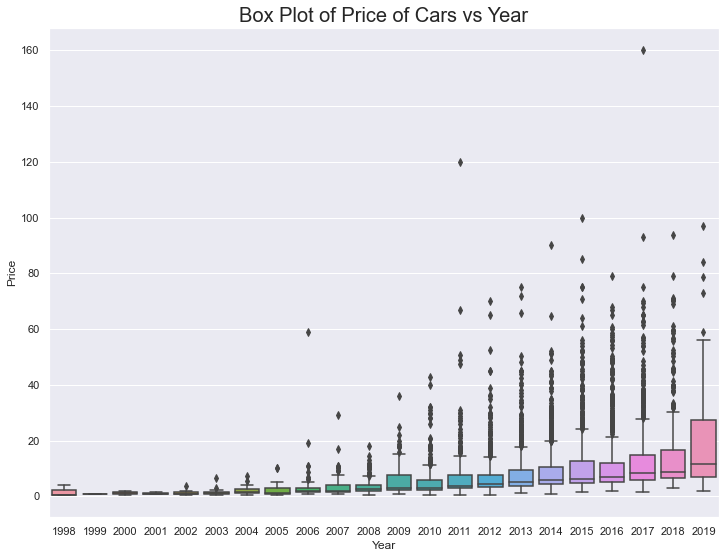

In [29]:
# We will also use a boxplot of Price vs Year
plt.figure(figsize = (12, 9))
sns.boxplot(x = "Year", y = "Price", data = train_data)
plt.title("Box Plot of Price of Cars vs Year", size = 20)

###### Clearly, The price Increases

### Fuel Type

Text(0.5, 1.0, 'Countplot for Fuel Type')

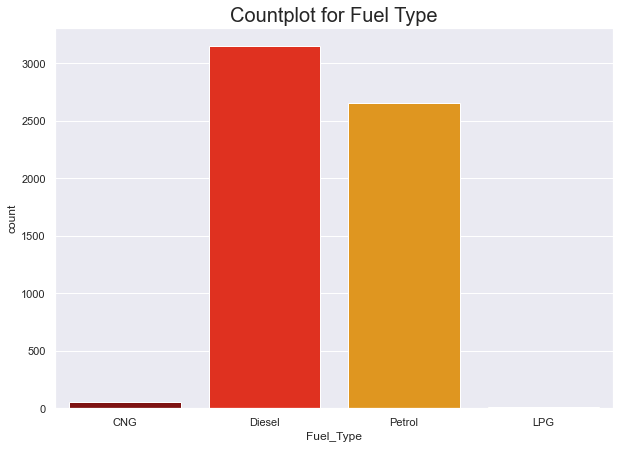

In [30]:
# Lets look at the Fuel Types of the cars
plt.figure(figsize = (10, 7))
sns.countplot(x = "Fuel_Type", palette = "hot", data = train_data)
plt.title("Countplot for Fuel Type", size = 20)

###### Most of the cars listed are of Fuel Type Diesel or Petrol and very few of them are CNG or LPG

Text(0.5, 1.0, 'Boxplot for Fuel Type')

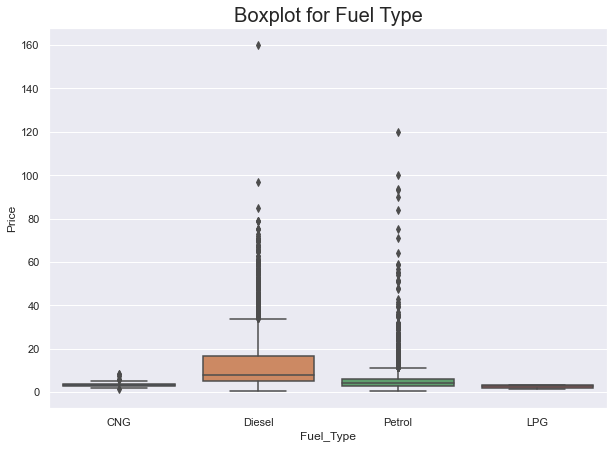

In [31]:
# Plotting a boxplot with Fuel Type and Price
plt.figure(figsize = (10, 7))
sns.boxplot(x = "Fuel_Type", y = "Price", data = train_data)
plt.title("Boxplot for Fuel Type", size = 20)

###### Diesel cars cost more than Petrol cars

### Number of Owners

Text(0.5, 1.0, 'Countplot for Owner Type')

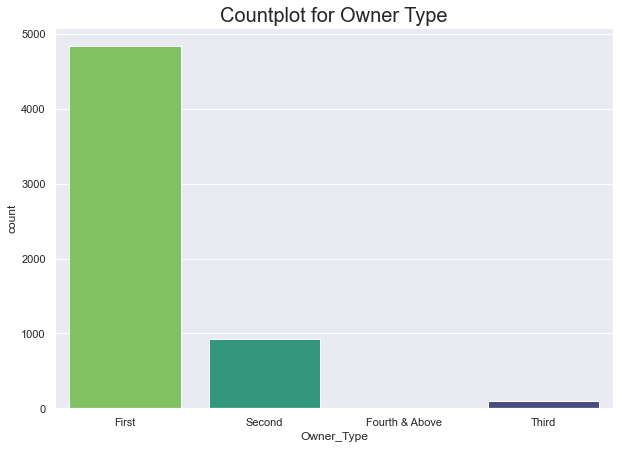

In [32]:
# Plotting for Number of Owners
plt.figure(figsize = (10, 7))
sns.countplot(x = "Owner_Type", palette = "viridis_r", data = train_data)
plt.title("Countplot for Owner Type", size = 20)

Text(0.5, 1.0, 'Boxplot for Owner Type and Price')

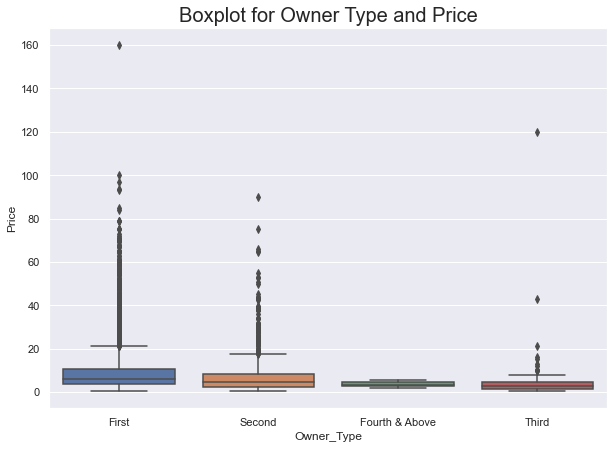

In [33]:
# Plotting a boxplot with Owner Type and Price
plt.figure(figsize = (10, 7))
sns.boxplot(x = "Owner_Type", y = "Price", data = train_data)
plt.title("Boxplot for Owner Type and Price", size = 20)

###### We can clearly see that the First Owner cars are more expensive

### Brand vs Price

Text(0.5, 1.0, 'Boxplot for Brand and Price')

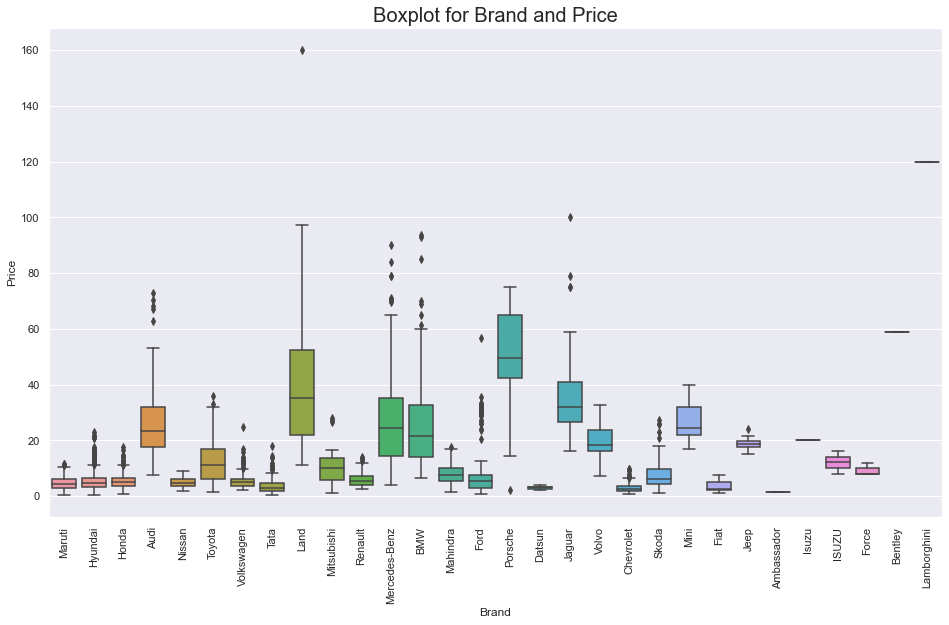

In [34]:
# Plotting Brand vs Price
plt.figure(figsize = (16, 9))
sns.boxplot(x = "Brand", y = "Price", data = train_data)
plt.xticks(rotation = 90)
plt.title("Boxplot for Brand and Price", size = 20)

###### We can see that there is a lot of variation between the car brands so it will not be used for our final model

# Model Building

In [35]:
# We will first drop the Brand Column
train_data = train_data.drop(["Brand"], axis = 1)

In [36]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Power(bhp),Mileage(km/kg),Engine(CC)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,58.16,26.60,998.0
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,126.20,19.67,1582.0
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,88.70,18.20,1199.0
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,88.76,20.77,1248.0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,140.80,15.20,1968.0


In [37]:
# The Owner Type variable can be converted by using label encoder as it is ordinal
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4}, inplace = True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Power(bhp),Mileage(km/kg),Engine(CC)
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,58.16,26.60,998.0
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,126.20,19.67,1582.0
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,88.70,18.20,1199.0
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,88.76,20.77,1248.0
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,140.80,15.20,1968.0


In [38]:
# Now we will use the get dummies function to get encode our categorica variables
train_final = pd.get_dummies(train_data, drop_first = True)
train_final.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Power(bhp),Mileage(km/kg),Engine(CC),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,58.16,26.60,998.0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,126.20,19.67,1582.0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,88.70,18.20,1199.0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,88.76,20.77,1248.0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,140.80,15.20,1968.0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Repeating the same process for test data

In [39]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [40]:
# Removing the First Column
test_data = test_data.iloc[:,1:]

#We will drop the New_Price column as it has a lot of missing values
test_data = test_data.drop(['New_Price'], axis = 1)

#Now we have to drop the other missing values in the dataset
test_data = test_data.dropna(axis = 0)

test_data = test_data.reset_index(drop = True)

# Now we can drop the Name Column
test_data = test_data.drop(['Name'], axis = 1)

#Similarly we we remove the extra information in columns Mileage, Engine and Power
test_data['Power(bhp)'] = test_data['Power'].apply(lambda x: str(x).split(" ")[0])
test_data['Mileage(km/kg)'] = test_data['Mileage'].apply(lambda x: str(x).split(" ")[0])
test_data['Engine(CC)'] = test_data['Engine'].apply(lambda x: str(x).split(" ")[0])

# We will convert the columns Mileage, Engine, Power into numeric types
# Trying to convert the Power variable gives error so we need to check that variable 
test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)

#Changing the 'null' in Power(bhp) to NaN value
test_data['Power(bhp)'] = test_data['Power(bhp)'].replace('null', np.nan)

#Dropping those missing values
test_data = test_data.dropna(axis = 0)
test_data = test_data.reset_index(drop = True)

#Now we can change the datatype of Power(bhp)
test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)

#Now we drop the original Power, Mileage and Engine columns
test_data = test_data.drop(['Power'], axis = 1)
test_data = test_data.drop(['Engine'], axis = 1)
test_data = test_data.drop(['Mileage'], axis = 1)

# The Owner Type variable can be converted by using label encoder as it is ordinal
test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4}, inplace = True)

test_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Power(bhp),Mileage(km/kg),Engine(CC)
0,Delhi,2014,40929,CNG,Manual,1,4.0,58.20,32.26,998.0
1,Coimbatore,2013,54493,Petrol,Manual,2,5.0,47.30,24.70,796.0
2,Mumbai,2017,34000,Diesel,Manual,1,7.0,147.80,13.68,2393.0
3,Mumbai,2014,29000,Petrol,Manual,1,5.0,82.85,18.50,1197.0
4,Coimbatore,2016,85609,Diesel,Manual,2,7.0,140.00,16.00,2179.0


In [41]:
# Now we will use the get dummies function to get encode our categorica variables
test_final = pd.get_dummies(test_data, drop_first = True)
test_final.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Power(bhp),Mileage(km/kg),Engine(CC),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,58.20,32.26,998.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,5.0,47.30,24.70,796.0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,7.0,147.80,13.68,2393.0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2014,29000,1,5.0,82.85,18.50,1197.0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2016,85609,2,7.0,140.00,16.00,2179.0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


# Feature Selection

In [42]:
train_final.shape

(5872, 22)

In [43]:
train_final.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Power(bhp)', 'Mileage(km/kg)', 'Engine(CC)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [44]:
X = train_final.loc[:, ['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Power(bhp)', 'Mileage(km/kg)', 'Engine(CC)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual']]

X.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Power(bhp),Mileage(km/kg),Engine(CC),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,58.16,26.60,998.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,126.20,19.67,1582.0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,88.70,18.20,1199.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,88.76,20.77,1248.0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,140.80,15.20,1968.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [45]:
y = train_final.loc[:, ['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


Text(0.5, 1.0, 'Correlation Plot')

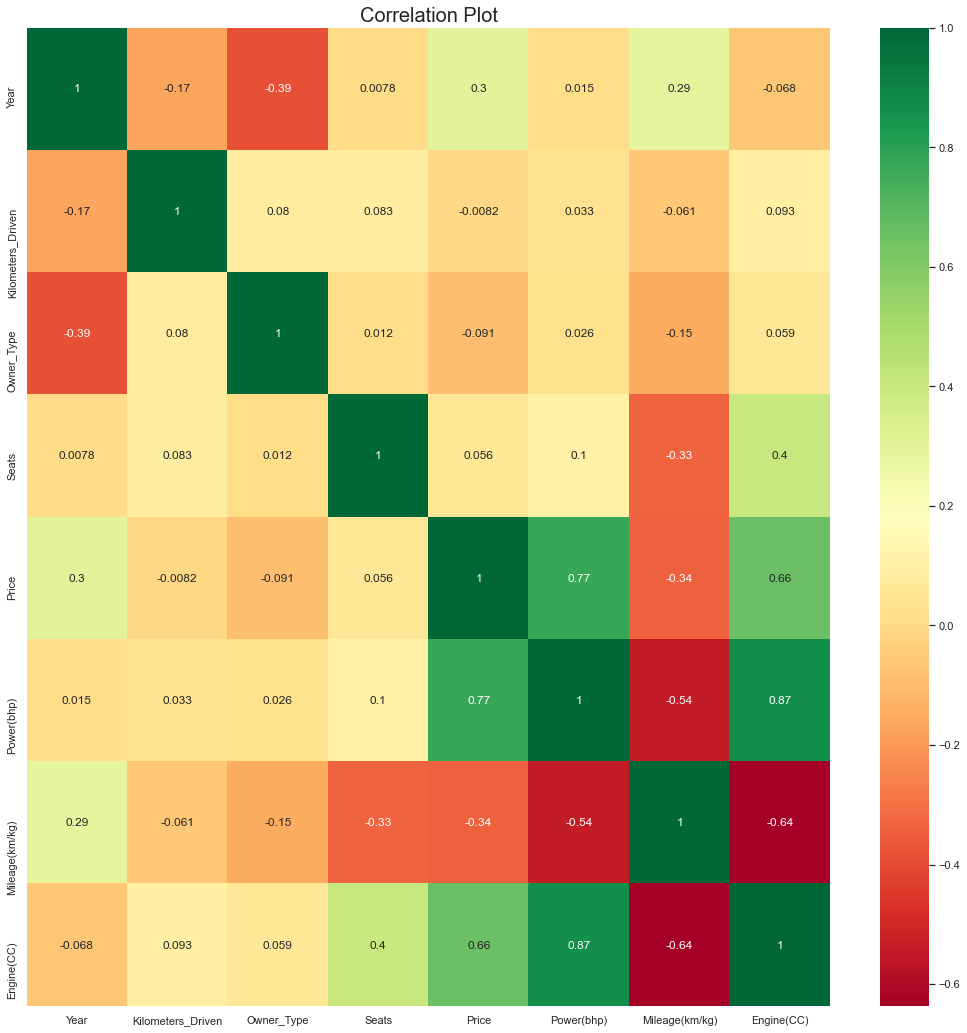

In [46]:
# Finding the correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.title("Correlation Plot", size = 20)

###### We observe that Power and Engine are highly positively correlated so we can also drop any one of these features

### USing ExtraTreesRegressor for finding important features

In [47]:
# Finding Important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

<ipython-input-47-fa4bda2c66db>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X, y)


ExtraTreesRegressor()

In [48]:
print(selection.feature_importances_)

[1.59026868e-01 2.56657652e-02 5.40381502e-03 3.44412089e-02
 2.86064767e-01 2.38186218e-02 9.35447963e-02 5.12950901e-03
 2.22661866e-03 8.53619374e-03 3.83029958e-03 1.33559863e-02
 8.25049554e-04 4.58324254e-03 2.23161995e-03 3.55341131e-03
 1.35482883e-03 4.89208967e-02 7.49806585e-07 7.30539281e-03
 2.70180358e-01]


<AxesSubplot:>

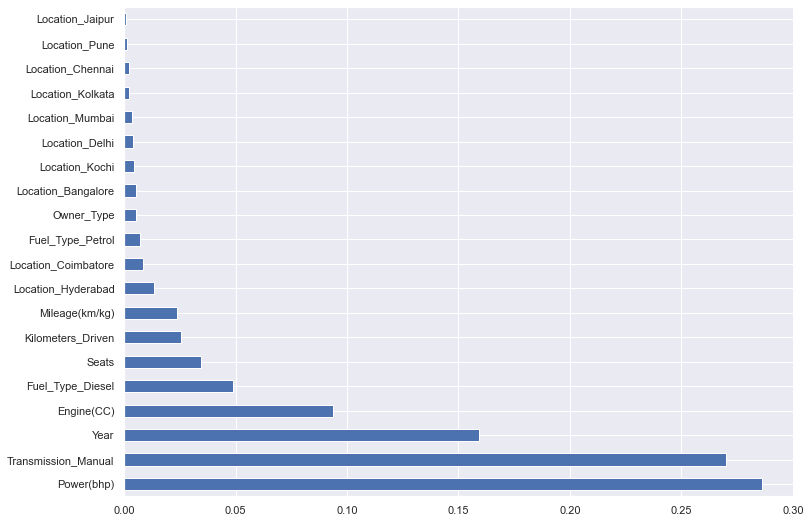

In [49]:
# Plotting the graph of important features
plt.figure(figsize = (12,9))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Model Fitting

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

###### Trying out Linear Regression First

In [51]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

In [52]:
# Accuracy on Train set
print("Accuracy on Train set: ",linear_reg.score(X_train,y_train))

Accuracy on Train set:  0.7074687824048685


In [53]:
# Accuracy on Test set
print("Accuracy on Test set: ",linear_reg.score(X_test,y_test))

Accuracy on Test set:  0.702387622834781


###### From above scores we can clearly see that the accuracy we get is not so good and we can certainly do much better

In [54]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

<ipython-input-54-fa714c644bc1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [55]:
y_pred = reg_rf.predict(X_test)

In [56]:
# Accuracy on Train set
reg_rf.score(X_train, y_train)

0.9840003406149636

In [57]:
# Accuracy on Test set
reg_rf.score(X_test, y_test)

0.9120442387707043

Text(0, 0.5, 'y_pred')

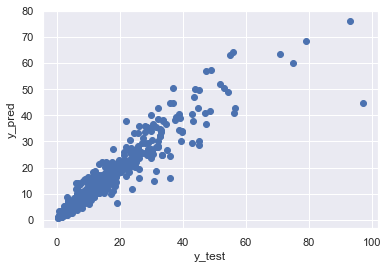

In [58]:
#Scatterplots of our ytest and ypred
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

###### Now we have a pretty good accuracy on both the sets

In [59]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.453749410334347
MSE: 9.681876083204086
RMSE: 3.111571320603802


In [61]:
print('r2:',metrics.r2_score(y_test, y_pred))

r2: 0.9120442387707043


# Hyperparameter Tuning

In [62]:
# We will use RandomizedSearchCV for hyperparameter tuning as it works fast
from sklearn.model_selection import RandomizedSearchCV

In [63]:
#Randomized Search CV Hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [65]:
# Random search of parameters, using 5 fold cross validation, 
# searching across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10,cv = 5, verbose=2, random_state=10, n_jobs = 1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.6s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.5s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.5s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.5s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.5s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   8.1s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   8.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   9.1s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   9.3s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   8.6s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   3.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   4.6s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   4.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   4.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   4.3s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   6.3s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   6.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   5.0s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   5.1s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   4.9s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   9.5s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  10.2s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  10.0s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  10.2s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  10.2s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   6.3s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   6.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   6.2s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   6.3s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   6.4s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   2.7s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   2.7s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   2.7s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   2.7s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   2.8s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s


D:\Anaconda\envs\carspred\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [68]:
prediction = rf_random.predict(X_test)

Text(0, 0.5, 'prediction')

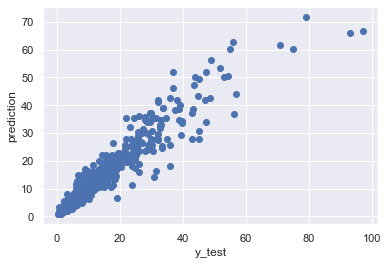

In [69]:
#Scatterplots of our ytest and prediction
plt.scatter(y_test, prediction)
plt.xlabel("y_test")
plt.ylabel("prediction")

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.449800163355427
MSE: 8.532096657177675
RMSE: 2.920975292120369


# Saving the model to reuse again

In [71]:
import pickle
# opening a file, where you ant to store the data
file = open('car_rf.pkl', 'wb')

# dumping information to that file
pickle.dump(reg_rf, file)

In [72]:
# Loading the model
model = open('car_rf.pkl','rb')
forest = pickle.load(model)

In [73]:
y_prediction = forest.predict(X_test)

In [74]:
print('r2:', metrics.r2_score(y_test, y_prediction))

r2: 0.9120442387707043
